In [1]:
import scipy.io
import numpy as np
import math
from sklearn import preprocessing
import random
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline 

def plot_num(center):
    center = np.reshape(center, (28, 28))
    plt.figure()
    plt.imshow(center)
    plt.colorbar()
    
def distance(instance1, instance2):
    y = int(math.sqrt(len(instance1)))
    inst = np.reshape(instance2, (y, y))
    inst0 = np.reshape(instance1, (y, y))
    d0 = np.linalg.norm(instance1 - instance2)
    inst1 = np.zeros([y,y])
    inst1[:,1:] = inst0[:,:y-1]
    inst2 = np.zeros([y,y])
    inst2[:,:y-1] = inst0[:,1:]
    inst3 = np.zeros([y,y])
    inst3[1:,:] = inst0[:y-1,:]
    inst4 = np.zeros([y,y])
    inst4[:y-1,:] = inst0[1:,:]
    d1 = np.linalg.norm(inst1 - inst)
    d2 = np.linalg.norm(inst2 - inst)
    d3 = np.linalg.norm(inst3 - inst)
    d4 = np.linalg.norm(inst4 - inst)
#     print d1, d2, d3, d4
    return min(d0,d1,d2,d3,d4)

def get_neighbors(instance,train_img, train_labels, K):
    distances = []
    for i in range(len(train_img)):
        dist = distance(instance, train_img[i])
        distances.append((train_img[i], dist, train_labels[i]))
    distances.sort(key=lambda x: x[1])
    return distances[:K]

def vote(neighbors,K):
    #img, dist,label
    counts = np.array([0]*10)
    best_label, best_dist, best_img = 0, 9999, neighbors[0][0]
    for i in range(K):
        img, dist,label = neighbors[i]
        counts+= label
        if best_dist > dist:
            best_label, best_dist,best_img = label, dist,img
    best_count = max(counts)
#     print "counts", counts
#     print "best_label, best_dist",best_label, best_dist
#     plot_num(best_img)
    best_labels = np.where(counts == best_count)[0]
#     print "best_labels", best_labels
    if len(best_labels) == 1:
        result = np.array([0]*10)
        result[best_labels[0]]=1
        return result
    else:
        return best_label
    
def weighted_vote(neighbors, K):
    counts = np.array([0]*10)
    for i in range(K):
        img, dist,label = neighbors[i]
        counts = counts + label*1.0/(i+1)
    result = np.array([0]*10)
    result[np.argmax(counts)] = 1
    return result

data = scipy.io.loadmat('dataset/mnist.mat')
print data.keys()
train_labels = data['trainY']
train_img = data['trainX']
print len(train_img[0])
print train_img.shape
print train_labels

lb = preprocessing.LabelBinarizer()
lb.fit(range(10))
train_labels = lb.transform(train_labels[0])
print train_labels[0]

train_img ,train_labels = shuffle(train_img, train_labels, random_state=0)
train_img = preprocessing.scale(train_img)
X = train_img[:55000]
y = train_labels[:55000]
Xv = train_img[55000:]
print Xv.shape
yv = train_labels[55000:]

test_img = data['testX']
test_img = preprocessing.scale(test_img)
test_labels = data['testY']
print test_img.shape
test_labels = lb.transform(test_labels[0])
print test_labels[0]

['testY', 'testX', '__header__', '__globals__', '__version__', 'trainX', 'trainY']
784
(60000, 784)
[[5 0 4 ..., 5 6 8]]
[0 0 0 0 0 1 0 0 0 0]


/Users/Justinsty/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


(5000, 784)
(10000, 784)
[0 0 0 0 0 0 0 1 0 0]


/Users/Justinsty/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [2]:
# print distance(X[0],X[1])
K = 10
interval = 100
count = 0
vali_acc = []
for i in range(5000):
    neighbors = get_neighbors(Xv[i], X, y, K)
    #img, dist,label
#     result = vote(neighbors,K)
    result = weighted_vote(neighbors,K)
    if list(result) == list(yv[i]):
        count += 1
    acc = 1.0*count/(i+1)
    if (i+1)%interval == 0:
        vali_acc.append(acc)
        print i,result, yv[i], list(result) == list(yv[i]), acc
        
count = 0
test_acc = []
for i in range(10000):
    neighbors = get_neighbors(test_img[i], train_img, train_labels, K)
#     result = vote(neighbors,K)
    result = weighted_vote(neighbors,K)
    if list(result) == list(test_labels[i]):
        count += 1

    acc = 1.0*count/(i+1)
    if (i+1)%interval == 0:
        test_acc.append(acc)
        print i,result, test_labels[i], list(result) == list(test_labels[i]), acc

99 [0 0 0 0 0 0 0 0 1 0] [0 0 0 0 0 0 0 0 1 0] True 0.98
199 [0 0 0 1 0 0 0 0 0 0] [0 0 0 1 0 0 0 0 0 0] True 0.975
299 [1 0 0 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0 0 0] True 0.973333333333
399 [0 0 0 0 0 0 0 1 0 0] [0 0 0 0 0 0 0 1 0 0] True 0.97
499 [0 0 0 0 0 0 1 0 0 0] [0 0 0 0 0 0 1 0 0 0] True 0.968
599 [0 0 0 0 0 0 0 0 0 1] [0 0 0 0 0 0 0 0 0 1] True 0.968333333333
699 [0 0 0 0 0 0 0 0 1 0] [0 0 0 0 0 0 0 0 1 0] True 0.968571428571
799 [0 0 0 0 0 0 0 0 0 1] [0 0 0 0 0 0 0 0 0 1] True 0.96375
899 [0 0 0 0 0 0 0 0 1 0] [0 0 0 0 0 0 0 0 1 0] True 0.963333333333
999 [0 1 0 0 0 0 0 0 0 0] [0 1 0 0 0 0 0 0 0 0] True 0.962
1099 [0 0 1 0 0 0 0 0 0 0] [0 0 1 0 0 0 0 0 0 0] True 0.963636363636
1199 [0 0 0 0 0 0 0 1 0 0] [0 0 0 0 0 0 0 1 0 0] True 0.965
1299 [0 1 0 0 0 0 0 0 0 0] [0 1 0 0 0 0 0 0 0 0] True 0.966153846154
1399 [0 0 0 0 0 0 1 0 0 0] [0 0 0 0 0 0 1 0 0 0] True 0.967857142857
1499 [0 0 0 1 0 0 0 0 0 0] [0 0 0 1 0 0 0 0 0 0] True 0.969333333333
1599 [1 0 0 0 0 0 0 0 0 0] [1 0 0 0 0 0

7499 [0 0 0 0 0 0 0 0 0 1] [0 0 0 0 0 0 0 0 0 1] True 0.952666666667
7599 [1 0 0 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0 0 0] True 0.952894736842
7699 [1 0 0 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0 0 0] True 0.953246753247
7799 [0 0 0 0 0 0 0 0 0 1] [0 0 0 0 0 0 0 0 0 1] True 0.953846153846
7899 [0 1 0 0 0 0 0 0 0 0] [0 1 0 0 0 0 0 0 0 0] True 0.954303797468
7999 [0 0 0 0 0 0 0 0 1 0] [0 0 0 0 0 0 0 0 1 0] True 0.95475
8099 [0 1 0 0 0 0 0 0 0 0] [0 1 0 0 0 0 0 0 0 0] True 0.954938271605
8199 [1 0 0 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0 0 0] True 0.955365853659
8299 [0 0 0 0 0 1 0 0 0 0] [0 0 0 0 0 1 0 0 0 0] True 0.955542168675
8399 [0 0 0 0 0 0 1 0 0 0] [0 0 0 0 0 0 1 0 0 0] True 0.955476190476
8499 [0 0 0 0 0 0 1 0 0 0] [0 0 0 0 0 0 1 0 0 0] True 0.955411764706
8599 [0 0 0 0 0 0 0 0 0 1] [0 0 0 0 0 0 0 0 0 1] True 0.955697674419
8699 [0 0 0 0 0 0 0 0 1 0] [0 0 0 0 0 0 0 0 1 0] True 0.956206896552
8799 [0 1 0 0 0 0 0 0 0 0] [0 1 0 0 0 0 0 0 0 0] True 0.956704545455
8899 [0 0 0 0 0 0 0 0 0 1] [0 0 0 0 0 0 0

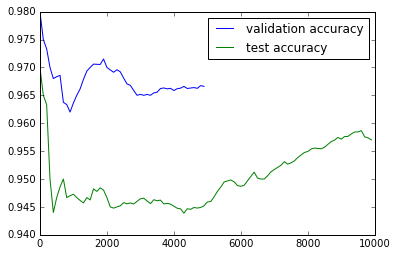

In [3]:
plt.plot([i * interval for i in range(len(vali_acc))], vali_acc)
plt.plot([i * interval for i in range(len(test_acc))], test_acc)
plt.legend(['validation accuracy','test accuracy'], loc = 'upper right')
plt.show()